# Hypothesis

#### A).Does age of the house have an impact on house sales? Hypothesis (more age , lesser the price sales)
#### B.) Does houses with waterfront view affect the price ? Hypothesis (people might prefer house with waterfront view) 
#### C.) Is the number of views of the house affecting the price ? Hypothesis(more views -> more rejections?)
#### D.) Which locations within the King County area have the highest average house prices?
#### E. )Does the year of renovation affect the prices of houses ? (max houses were renovated in the year 2010, does that mean a calamity had accured that year,and thus leading to demand of houses)
#### F). Does the area of house (living and basement/lot) affect the pricing of the house.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import os

# Read Data

In [4]:
# Read data
os.chdir(r'C:\Users\ash65\Documents\Praxis\IML Project')
kc=pd.read_csv("kc train data.csv")
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1000000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [7]:
kc.info() #to know all column information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9761 non-null   int64         
 1   date           9761 non-null   datetime64[ns]
 2   price          9761 non-null   float64       
 3   bedrooms       9761 non-null   int64         
 4   bathrooms      9761 non-null   float64       
 5   sqft_living    9761 non-null   int64         
 6   sqft_lot       9761 non-null   int64         
 7   floors         9761 non-null   float64       
 8   waterfront     9761 non-null   int64         
 9   view           9761 non-null   int64         
 10  condition      9761 non-null   int64         
 11  grade          9761 non-null   int64         
 12  sqft_above     9761 non-null   int64         
 13  sqft_basement  9761 non-null   int64         
 14  yr_built       9761 non-null   int64         
 15  yr_renovated   9761 n

# 2) EDA

In [6]:
kc.date=pd.to_datetime(kc.date) #to convert the date column into proper timestamp
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,2014-05-12,1000000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [5]:
total_null = kc.isnull().sum().sort_values(ascending=False) #to check the presence of null values
total_null

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

# CORRELATION

In [6]:
var = kc[kc.columns[1:]].corr()['price'][:] 
var

price            1.000000
bedrooms         0.300765
bathrooms        0.527370
sqft_living      0.704886
sqft_lot         0.094024
floors           0.263036
waterfront       0.274985
view             0.399767
condition        0.044798
grade            0.665481
sqft_above       0.611352
sqft_basement    0.322226
yr_built         0.051678
yr_renovated     0.120463
zipcode         -0.055595
lat              0.299176
long             0.023628
sqft_living15    0.584634
sqft_lot15       0.077759
Name: price, dtype: float64

# UNI VARIATE ANALYSIS

## 1) Attribute - id

In [7]:
kc.id.value_counts()[kc.id.value_counts()>1].count() # counting no. of duplicate ID rows

40

In [8]:
kc.id.value_counts()[kc.id.value_counts()>1] #counting the number of row occurances for each IDsS

795000620     3
109200390     2
1232000810    2
8682262400    2
3323059027    2
9222400605    2
5101402435    2
1781500435    2
2473380920    2
1523049207    2
1630700361    2
4443800385    2
251300110     2
8564860270    2
6021500970    2
6791200120    2
1524079093    2
705730280     2
6021501535    2
3332000615    2
2724049222    2
9809000020    2
7524400250    2
2231500030    2
1254200015    2
1139600270    2
2044500213    2
7227800055    2
1788800630    2
7853420110    2
9828200460    2
1545800290    2
2019200220    2
7129304540    2
1825069031    2
1788900230    2
8945100320    2
2143700830    2
1568100300    2
7856400240    2
Name: id, dtype: int64

In [9]:
#Analysing the repeated id rows
kc[kc.id==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7990,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
7991,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
7992,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


In [10]:
#Dropping the duplicate values and keeping just the latest record of the house being sold
kc = kc.drop_duplicates(subset='id',keep='last') 

In [11]:
#to check whether the correct row has got deleted.?
kc[kc.id==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7992,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


### While analyzing the column ID we noticed that some of the House Ids are duplicate but with different sale dates and prices and rest all attributes being same. This means the houses were resold. Since the number of such cases are very less ,so we will drop the rows with older date of sale and will take only those houses that are sold in the most recent date.

## 2) . Attribute- Price

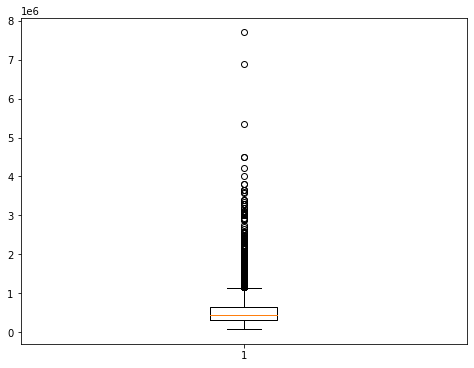

In [12]:
#plot a box plot for price column
fig = plt.figure(figsize =(8, 6))
plt.boxplot(kc['price'])
plt.show()

#### Observation - We observe that approx. 5% of the price data contains outliers. We can also observe from the graph that most of the outliers are present above the upper whisker (520 values) and there are no values ( 0 values) below the minimum or lower whisker.

## 3) . Attribute- Bedrooms

2.4588477366255144

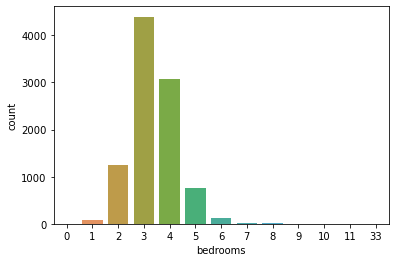

In [13]:
#shows thw count of each number of bedroom using bars
ax = sns.countplot(x="bedrooms", data=kc)

# find the outliers in the column price and calculate what percentage of total it constitutes.
quartile1 = kc['bedrooms'].quantile(0.25)
quartile3 = kc['bedrooms'].quantile(0.75)
IQR = quartile3 - quartile1
min_outlier = quartile1- (1.5*IQR)
max_outlier = quartile3 + (1.5*IQR)
values_less_than_min_outlier = (kc['bedrooms'] < min_outlier).sum()
values_more_than_max_outlier = (kc['bedrooms'] > max_outlier).sum()
percentage_from_total = ((values_less_than_min_outlier+values_more_than_max_outlier)/kc['id'].count())*100
percentage_from_total

In [14]:
#some unusual observation
kc[kc['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7204,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


#### Observation - 
#### 1. We can observe that houses with the number of bedrooms as 3 is more in number.
#### 2. We observe that approx. 2.45% of the bedroom data consists of outliers.
#### 3. We observed some unusual observation in the dataset where when the number of bedrooms was more (like 33 in this case considered), the values under sqrt_living and sqrt_lot were very less than what it should have been. Logically , we can assume that that might be some error in data entry.

## 4) . Attribute- Bathrooms

In [15]:
import warnings #to ignore the warnings while plotting
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='bathrooms'>

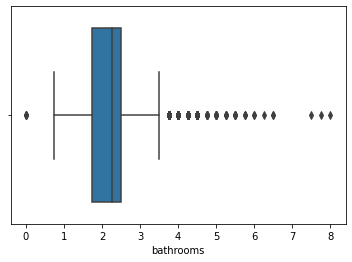

In [16]:
sns.boxplot(kc['bathrooms'])

In [17]:
## find the outliers in the column price and calculate what percentage of total it constitutes
quartile1 = kc['bathrooms'].quantile(0.25) #1st quartile
quartile3 = kc['bathrooms'].quantile(0.75) #3rd quartile
IQR = quartile3 - quartile1  #inter quartile range
min_outlier = quartile1- (1.5*IQR)
max_outlier = quartile3 + (1.5*IQR)
values_less_than_min_outlier = (kc['bathrooms'] < min_outlier).sum()
values_more_than_max_outlier = (kc['bathrooms'] > max_outlier).sum()
percentage_from_total = ((values_less_than_min_outlier+values_more_than_max_outlier)/kc['id'].count())*100
percentage_from_total

2.633744855967078

#### Observation - here we observe that 2.64 % of the bathroom data are the outliers. Most of the outlier values lies in the upper whisker .

## 5) Attribute - Square feet living

In [18]:
kc['sqft_living'].describe()   #to describe the column

count     9720.000000
mean      2087.773868
std        927.812691
min        290.000000
25%       1420.000000
50%       1920.000000
75%       2570.000000
max      12050.000000
Name: sqft_living, dtype: float64

In [19]:
## find the outliers in the column price and calculate what percentage of total it constitutes
quartile1 = kc['sqft_living'].quantile(0.25)
quartile3 = kc['sqft_living'].quantile(0.75)
IQR = quartile3 - quartile1
min_outlier = quartile1- (1.5*IQR)
max_outlier = quartile3 + (1.5*IQR)
values_less_than_min_outlier = (kc['sqft_living'] < min_outlier).sum()
values_more_than_max_outlier = (kc['sqft_living'] > max_outlier).sum()
percentage_from_total = ((values_less_than_min_outlier+values_more_than_max_outlier)/kc['sqft_living'].count())*100
percentage_from_total

2.4691358024691357

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

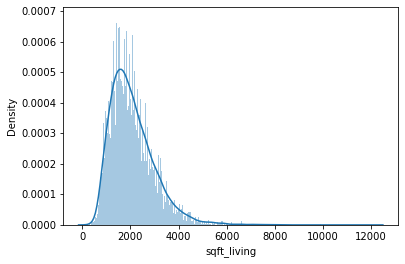

In [20]:

sns.distplot(kc['sqft_living'],bins = 500)  #plot the attribute


#### Observation -  Square feet attribute describes the area that is occupied by the building. we use the scale of measurement.There are about 2% of the data that are considered to be outliers. But on the exterior look, this attribute need not undergo an outlier treatment


## Attribute-6) Sqft_lot

Upper whisker 19000.0
Lower whisker -3240.0
Number of values above the upper whisker 1085
Number of values below the lower whisker 0
Percentage of outliers in the column 'sqft_lot' 11.162551440329219


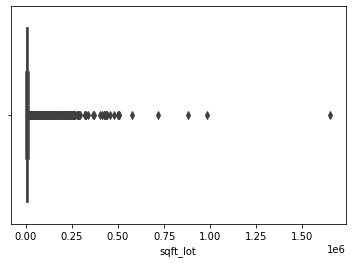

In [21]:
#plot the box plot
sns.boxplot(kc['sqft_lot'])
# find the outliers in the column price and calculate what percentage of total it constitutes.
quartile1 = kc['sqft_lot'].quantile(0.25)
quartile3 = kc['sqft_lot'].quantile(0.75)
IQR = quartile3 - quartile1
min_outlier = quartile1- (1.5*IQR)
max_outlier = quartile3 + (1.5*IQR)
values_less_than_min_outlier = (kc['sqft_lot'] < min_outlier).sum()
values_more_than_max_outlier = (kc['sqft_lot'] > max_outlier).sum()
percentage_from_total = ((values_less_than_min_outlier+values_more_than_max_outlier)/kc['id'].count())*100
print("Upper whisker",max_outlier)
print("Lower whisker",min_outlier)
print("Number of values above the upper whisker",values_more_than_max_outlier)
print("Number of values below the lower whisker",values_less_than_min_outlier)
print("Percentage of outliers in the column 'sqft_lot'",percentage_from_total)

<AxesSubplot:>

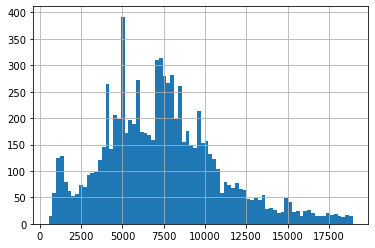

In [22]:
#Since the upper whisker is 19000 , we will analyze the data with values below it.
kc.sqft_lot[kc.sqft_lot<19000].hist(bins=80)

#### Observation -
#### 1. We observe that approx. 11% of the sqrt_lot data consists of outliers. There are no outlier values below the lower whisker and all of the outliers are above the upper whisker.

## Attribute 7 - Floors

<AxesSubplot:xlabel='floors', ylabel='count'>

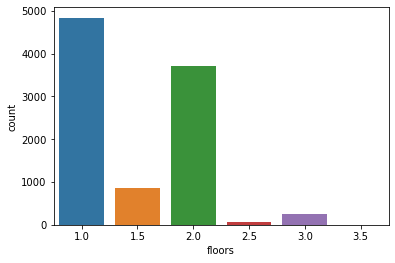

In [23]:
#to find the number of floors
no_of_floor = kc['floors'].value_counts().reset_index().rename(columns={'index':'floors','floors':'count'})
sns.barplot(x='floors', y='count', data = no_of_floor)

#### Obsrervation- Here the floors represent the number of floors that a house has. It is a categorical variable. So it Might not require one hot encoding, as it is already a numeric value

## Attribute 8- Waterfront

In [24]:
#count of houses with and without waterfront
waterfront_one = (kc.waterfront==1).sum()
waterfront_zero = (kc.waterfront==0).sum()
print('Count of houses with a waterfront',waterfront_one)
print('Count of houses without a waterfront',waterfront_zero)

Count of houses with a waterfront 82
Count of houses without a waterfront 9638


In [25]:
#calculations for analyzing purpose
sum_of_waterfront_houses = waterfront_one+waterfront_zero
waterfront_one_percentage = (waterfront_one/sum_of_waterfront_houses)*100
waterfront_zero_percentage = (waterfront_zero/sum_of_waterfront_houses)*100
print(" Percentage of houses with a waterfront",waterfront_one_percentage)
print(" Percentage of houses without a waterfront",waterfront_zero_percentage)

 Percentage of houses with a waterfront 0.8436213991769548
 Percentage of houses without a waterfront 99.15637860082305


#### Observation - Here we can observe that almost 99% of the data have houses are with no waterfront.

## Attribute 9 - View

In [26]:
#to count the no. of house views
kc['view'].value_counts()

0    8709
2     454
3     242
1     160
4     155
Name: view, dtype: int64

<AxesSubplot:xlabel='view', ylabel='count'>

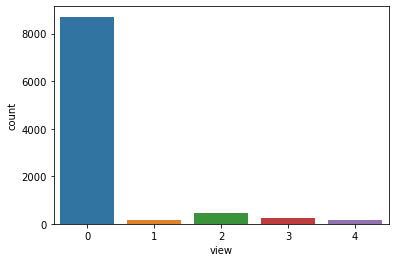

In [27]:
view = kc['view'].value_counts().reset_index().rename(columns={'index':'view','view':'count'})
sns.barplot(x='view', y='count', data = view)

#### Observation- Attribute View means the number of times the house has been viewed. Here we can consider that more no. of times the house has been viewed, the more number of rejections of various reasons  it has. Here we can say that the views and price has high positive correlation.

## Attribute 10- GRADE

<AxesSubplot:xlabel='grade', ylabel='count'>

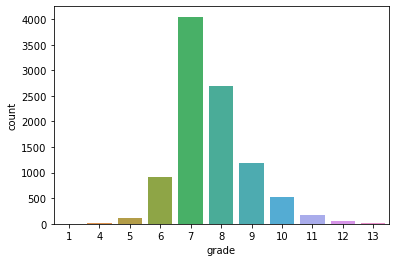

In [28]:
scaling = kc['grade'].value_counts().reset_index().rename(columns={'index':'grade','grade':'count'})
sns.barplot(x='grade', y='count', data = scaling)

#### Observation- Here we have used the ordinal scale and the ratings vary in the scale of 1 to 13 where the assumption is 1 to be poor quality and 13 being of highest quality. Here the most average grades appears in the range of 6 to all

## Attribute - 11 : Sq_Ft Basement

In [29]:
kc['sqft_basement'].describe()

count    9720.000000
mean      293.645782
std       442.782151
min         0.000000
25%         0.000000
50%         0.000000
75%       570.000000
max      3480.000000
Name: sqft_basement, dtype: float64

<AxesSubplot:xlabel='sqft_basement'>

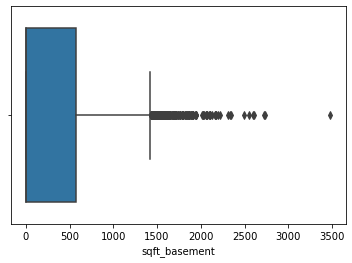

In [30]:
sns.boxplot(kc['sqft_basement'])

#### Observation- Here this variable can be avoided as sqft_living is the sum of sqft_above + sqft_basement so from this we can build a new variable as basement present or not instead where 0 would indicate as basement not present and 1 as basement present

## Attribute - 12 : Year Renovated

In [31]:
kc[kc['yr_renovated'] != 0]['yr_renovated'].count()/kc.shape[0] * 100

4.320987654320987

#### Observation - Here the attribute year renowated means the year in which the house is renowated. here the 0 represents that there is no renovations done. We can use one hot encoding here to get this data in binary form where 1 - house renovated and 0 - house not renovated.

## Multi Variate Analysis

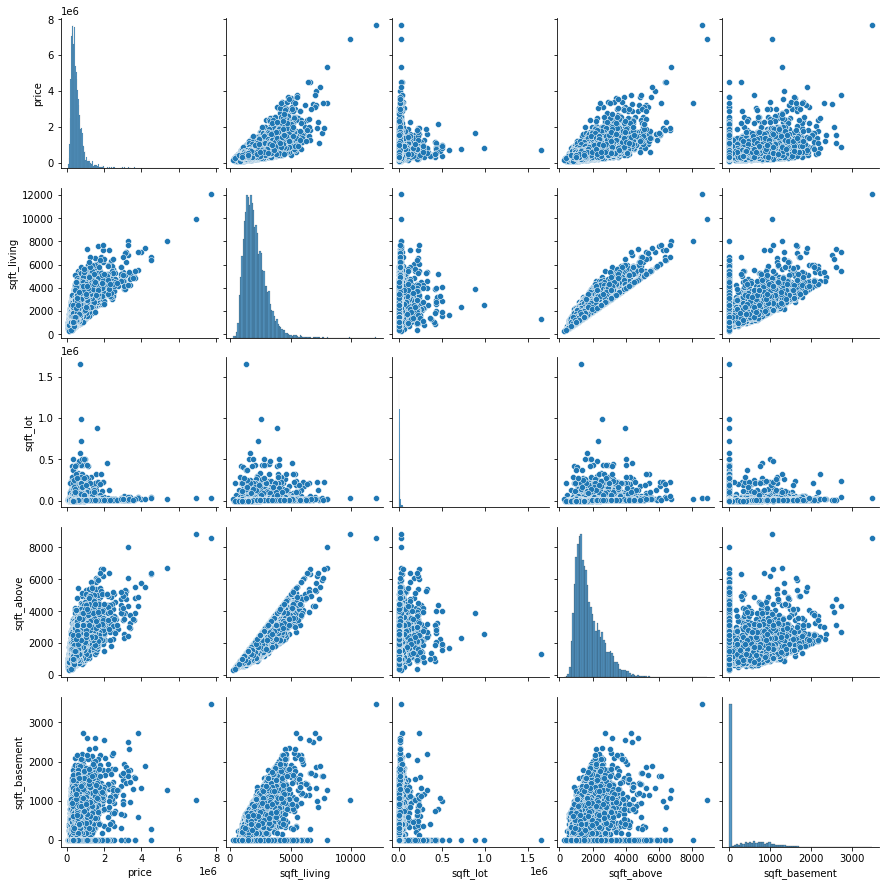

In [32]:
sns.pairplot(kc.loc[:,['price','sqft_living','sqft_lot','sqft_above','sqft_basement']]);

In [33]:
kc.loc[:,['price','sqft_living','sqft_lot','sqft_above','sqft_basement']].corr()  #to find the correlation between attributes

,price,sqft_living,sqft_lot,sqft_above,sqft_basement
price,1.000000,0.704850,0.093875,0.611426,0.322040
sqft_living,0.704850,1.000000,0.162704,0.879062,0.434968
sqft_lot,0.093875,0.162704,1.000000,0.180938,-0.000839
sqft_above,0.611426,0.879062,0.180938,1.000000,-0.046885
sqft_basement,0.322040,0.434968,-0.000839,-0.046885,1.000000


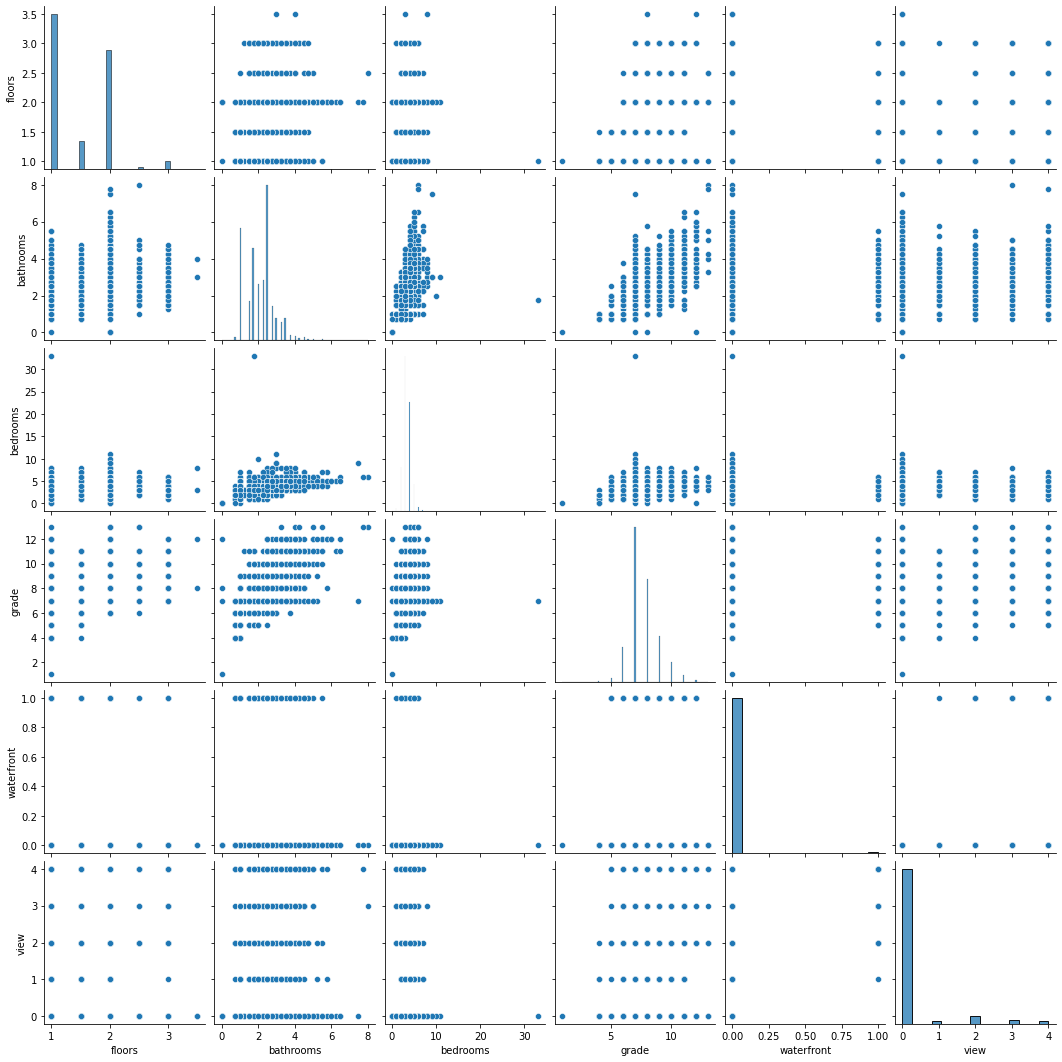

In [34]:
sns.pairplot(kc.loc[:,['floors','bathrooms','bedrooms','grade','waterfront','view']]); #to find the correlation between attributes

## Adding New Feature from existing feature


In [35]:
#adding the age column in test nd train data
kc['age'] = abs(kc['yr_built'] - kc['date'].dt.year)
kc.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
1,7237550310,2014-05-12,1000000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,13
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,72
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,87
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,37


In [86]:
kctest=pd.read_csv("kc test data.csv")

In [37]:
kctest.date=pd.to_datetime(kctest.date)
kctest['age'] = abs(kctest['yr_built'] - kctest['date'].dt.year)
kctest.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,12
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,115
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,93
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,85
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,46


In [87]:
#ADDING 'IS BASEMENT PRESENT OR NOT COLUMN FROM EXISTING SQFT_BASEMENT COLUMN'
kc['basement_present']=kc['sqft_basement'].apply(lambda x: 1 if x>0 else 0) #to indicate 0 as no basement and 1 as basement present

kctest['basement_present']=kc['sqft_basement'].apply(lambda x: 1 if x>0 else 0) #to indicate 0 as no basement and 1 as basement prese

In [104]:
##ADDING 'IS RENOWATED OR NOT COLUMN FROM EXISTING YR_RENOVATED COLUMN'
kc_data['renovated']=kc['yr_renovated'].apply(lambda x: 1 if x>0 else 0) #to indicate 0 as not renovated and 1 as renovated

kc_test['renovated']=kctest['yr_renovated'].apply(lambda x: 1 if x>0 else 0) #to indicate 0 as not renovated and 1 as renovated

In [93]:
#one hot encoding of the column zipcode in the train data
zipcode_dummies = pd.get_dummies(kc['zipcode'], prefix='zipcode')
zipcode_dummies

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
zipcode_dummies_test = pd.get_dummies(kctest['zipcode'], prefix='zipcode')  #to get the one hot encoded value for attribute ZIPCODE

In [90]:
#taking a copy of the original dataset ( so that we don't hamper the original data)
kc_data=kc.copy()
kc_test=kctest.copy()

In [95]:
#concatenating the train data with the the zipcode one hot encoded columns
kc_data = pd.concat([kc_data,zipcode_dummies],axis =1).drop(['zipcode'],axis=1)
kc_test = pd.concat([kc_test,zipcode_dummies_test],axis =1).drop(['zipcode'],axis=1)

## Applying Linear Regression 

In [45]:
#importing the necessary libraries from sklearn so as to fit the linear regression model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [46]:
X = kc_data.drop(['price'],axis=1) #Assiging all the possible predictors 
y = kc_data['price'] #assiging the target varible

In [47]:
#from sklearn.metrics import mean_absolute_error

In [48]:
def linearreg(features):
    X = kc_data[features]
    y = kc_data['price']

    #X=stm.add_constant(X)

    #X = np.square(X)

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

    # Create a Linear regressor
    lm = LinearRegression()

    # Train the model using the training sets 
    lm.fit(X_train, y_train)

    y_pred = lm.predict(X_test)

    # Model Evaluation
    print('R^2:',metrics.r2_score(y_test, y_pred))
    print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
    print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:',metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('MAPE',mape(y_test,y_pred))
    scores = cross_val_score(lm,X_train, y_train, cv=10) #applying K fold validation of CV - 10
    print("cross validation score", np.mean(scores)) 

In [49]:
import numpy as np  #to import the numpy library
def mape (y_test,y_pred): #to calculate mean absolute percentage error
    y_test,y_pred = np.array(y_test),np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

   ## Selecting set of predictors (To choose the best 1)
   

In [50]:
#fitting the linear regression model by taking all the attributes
features= ['floors','bathrooms','bedrooms','grade','waterfront','sqft_basement','view','sqft_living']
linearreg(features)

R^2: 0.5984657293661917
Adjusted R^2: 0.5973607158935152
MAE: 155549.30153992178
MSE: 50664385380.825935
RMSE: 225087.50605225944
MAPE 32.464635358138025
cross validation score 0.5920122539397488


In [51]:
#selecting few attributes in combination to fit our model
features = ['sqft_living','view','waterfront']
linearreg(features)

R^2: 0.5465606313786062
Adjusted R^2: 0.546093489171922
MAE: 166403.55406565123
MSE: 57213614375.70503
RMSE: 239193.6754508886
MAPE 34.837630253218954
cross validation score 0.5557419250942465


In [52]:
linearreg(['sqft_living','grade','waterfront'])

R^2: 0.5782358454725692
Adjusted R^2: 0.5778013356979874
MAE: 161203.93386927064
MSE: 53216931224.990204
RMSE: 230687.95205859843
MAPE 34.12545438990222
cross validation score 0.5712185971097112


In [53]:
linearreg(['sqft_living','bedrooms','bathrooms'])

R^2: 0.4984004273846392
Adjusted R^2: 0.497883669583181
MAE: 171941.73291618473
MSE: 63290323921.114624
RMSE: 251575.68229285322
MAPE 35.51022875862826
cross validation score 0.501757412822889


In [54]:
linearreg(['floors','bathrooms','bedrooms'])

R^2: 0.26417589573710876
Adjusted R^2: 0.2634178351901346
MAE: 206334.367711775
MSE: 92844070151.29948
RMSE: 304703.24932842364
MAPE 44.71993691366119
cross validation score 0.276075928426686


In [55]:
linearreg(['sqft_living','grade','age','lat','long','sqft_lot','condition','yr_renovated'])

R^2: 0.6375727632411506
Adjusted R^2: 0.6365753714647245
MAE: 138989.63005597817
MSE: 45729977584.91237
RMSE: 213845.68638369202
MAPE 28.48834463956286
cross validation score 0.6416588717349633


In [61]:
#creating the feature with only sqft_living',waterfront,view grade and the encoded zip code so as to see the impact on price
cols = kc_data.drop(['square_sqft_living','log_sqft_living','id','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','yr_renovated','sqft_lot15','age','sqft_basement','basement_present','renovated'], axis=1).columns.to_list()

In [62]:
linearreg(cols) #passing the cols feature set to the linear regression model

R^2: 0.8023542399335631
Adjusted R^2: 0.7972061279149372
MAE: 100860.44841499485
MSE: 24938346958.74423
RMSE: 157918.79862367312
MAPE 21.2505324198516
cross validation score 0.7800449382230475


In [63]:
# keepin only sqft_living,waterfront,view,grade,basement_present,renovated and one hot encofded zipcode,square of sq_ft living as feture set
col1=kc_data.drop(['id','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','yr_renovated','sqft_lot15','age','sqft_basement','log_sqft_living'], axis=1).columns.to_list()

In [64]:
#Evaluating the model
linearreg(col1) 

R^2: 0.8181785560425076
Adjusted R^2: 0.8132454160901725
MAE: 92462.83690749519
MSE: 22941682393.93369
RMSE: 151465.1193969545
MAPE 18.072585765588247
cross validation score 0.8292307801625636


## From all the above features that we tried fitting our model, the best features that we found giving maximum accuracy in predicting the price are : - 
### 1) Feature set 1- sqft_living,waterfront,view,grade and one hot encoded zipcode - 80.23% accuracy
### 2) Feature set 2- sqft_living,waterfront,view,grade,basement_present,renovated and one hot encofded zipcode,square of sq_ft living - 81.81% accuracy

#### Observation- we can clearly see here that the feature encoded zipcode has given a good R square score that is of .80.

## Decision Tree

In [65]:
#for fitting Regression tree
from sklearn.tree import DecisionTreeRegressor

#to create confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.model_selection import train_test_split

In [66]:
#defining the Decision tree function
def dtreg(feature_cols):
    X = kc_data[feature_cols]
    y = kc_data['price']
#splitting the data into test and train
    X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 100)
    
    model = DecisionTreeRegressor(max_depth= 8, min_samples_leaf=5)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(x_test)
 #Evaluating the Model   
    print('R^2:',metrics.r2_score(y_test, y_pred))
    accuracy = np.sqrt(np.mean((y_test-y_pred)**2))
    print("accuracy ", accuracy)
    plt.figure(figsize = (8,10))
    tree.plot_tree(model, feature_names = X_train.columns,max_depth=None, filled = True,fontsize=8)

R^2: 0.5940758062172107
accuracy  233913.66791977527


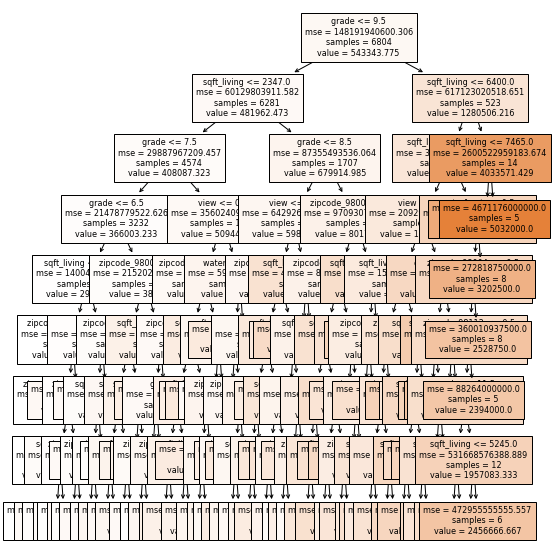

In [67]:
dtreg(cols)

## Feature Transformation

In [59]:
#Taking the log of sqft_living has the effect of bringing large values closer together and spreading
#out small values
kc_data["log_sqft_living"] = np.log(kc_data['sqft_living'])
#kctest["log_sqft_living"] = np.log(kctest['sqft_living'])


In [68]:
#taking waterfront,view,grade and encoded zipcode along with the transformed feature log_sqft_living
feature2=kc_data.drop(['log_sqft_living','square_sqft_living','id','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','yr_renovated','sqft_lot15','age','sqft_basement','basement_present','renovated','sqft_living'], axis=1).columns.to_list()

In [69]:
linearreg(feature2) #Evaluating the Model

R^2: 0.7315558253976084
Adjusted R^2: 0.724660531679813
MAE: 118586.89814814815
MSE: 33871477754.1286
RMSE: 184042.0543085971
MAPE 24.629989799706188
cross validation score 0.7006127388784333


In [70]:
#qft_living, view, one hot enceded zip code, grade and waterfron
feature3=kc_data.drop(['log_sqft_living','square_sqft_living','id','date','price','sqft_above','bedrooms','bathrooms','sqft_lot','floors','condition','sqft_basement','yr_built','yr_renovated','sqft_living15','lat','long','yr_renovated','sqft_lot15','age','sqft_basement','basement_present','renovated',], axis=1).columns.to_list()

R^2: 0.5940758062172107
accuracy  233913.66791977527


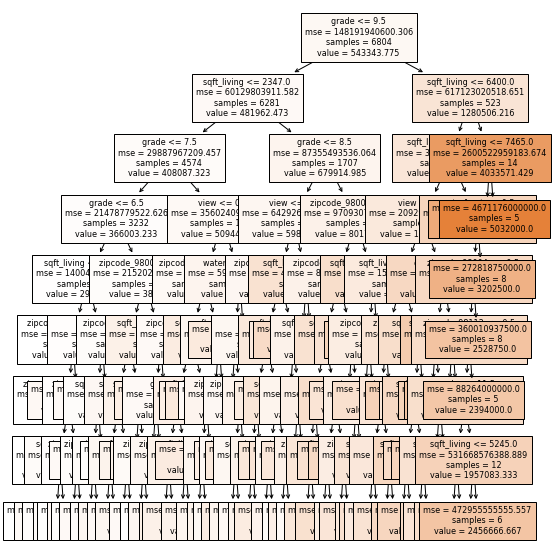

In [71]:
dtreg(feature3) 

In [97]:
#square the column sqft_living to see if it has any impact on the pricing of the houses
kc_data["square_sqft_living"] = np.square(kc_data['sqft_living'])
kc_test["square_sqft_living"] = np.square(kc_test['sqft_living'])
#kc_data

#### OBSERVATION - From this we can say that the log transformation did not help us in improving the Rsq score rather it decreased

# TESTING THE MODEL ON TEST DATA

In [72]:
import statsmodels.api as stm  #to import the stats library

In [101]:
#Defining the linear regression method
def LinearReg(n):
    X_train = kc_data[n]
    X_train = stm.add_constant(X_train)
    X_test  = kc_test[n]
    X_test  = stm.add_constant(X_test)
    y_train = kc_data.price
    y_test  = kc_test.price
  #fitting the linear model  
    mod = stm.OLS(y_train,X_train).fit()
    mod.params

 
    # MODEL EVALUATION
    from sklearn.metrics import mean_squared_error,r2_score
    y_pred = mod.predict(X_test)
    rmse=(np.sqrt(np.mean((np.array(y_test)-y_pred)**2)))
    print("RMSE:{} \n MSE:{} \n R2_Score:{}".format(rmse, mean_squared_error(y_test, y_pred),r2_score(y_test, y_pred)))

In [74]:
LinearReg(cols) # Passing the best feature 1

RMSE:158338.56658973053 
 MSE:25071101669.690502 
 R2_Score:0.8047552315483455


In [106]:
LinearReg(col1) # Passing the best feature 1

RMSE:152556.48226127977 
 MSE:23273480279.936153 
 R2_Score:0.8187544636774481


## Hence here we choose LINEAR REGRESSION MODEL as our best model to predict the Price with 81.87 ~ 82% accuracy. And the best Feature set is sqft_living,waterfront,view,grade,basement_present,renovated and one hot encofded zipcode,(feature transformed variable) square of sq_ft living.